In [465]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import requests
import json
import time
import matplotlib.pyplot as plt

In [466]:
df = pd.read_csv('../Data/aac_intakes_outcomes.csv')

In [467]:
df.outcome_type.unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [468]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days'], dtype='object')

In [469]:
df.outcome_type.value_counts(dropna=False)

Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
NaN                   10
Name: outcome_type, dtype: int64

In [470]:
df[df.outcome_type=='Transfer'].head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
11,14 years,A197810,2000-01-21 00:00:00,Partner,Transfer,Spayed Female,5110,14.0,"(12.5, 15.0]",2014-12-22 15:23:00,12,2014,2014-12,Monday,15,1.0,2000,1,2014-12,14 years,A197810,Cat,American Shorthair Mix,Brown Tabby/White,4616 E Cesar Chavez in Austin (TX),Normal,Stray,Spayed Female,1,5110,14.0,"(12.5, 15.0]",2014-12-08 12:30:00,12,2014,2014-12,Monday,12,1.0,14 days 02:53:00.000000000,14.120139
28,15 years,A238870,2001-05-24 00:00:00,Partner,Transfer,Neutered Male,5475,15.0,"(12.5, 15.0]",2016-06-17 12:37:00,6,2016,2016-06,Friday,12,1.0,2001,5,2016-06,15 years,A238870,Dog,Rat Terrier Mix,Gray/White,8411 Ganttcrest Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2016-06-09 16:22:00,6,2016,2016-06,Thursday,16,1.0,7 days 20:15:00.000000000,7.843750
30,15 years,A245945,2000-05-23 00:00:00,Partner,Transfer,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-05-25 11:49:00,5,2015,2015-05,Monday,11,1.0,2000,5,2015-05,15 years,A245945,Dog,Labrador Retriever Mix,Tan,7403 Blessing Ave in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-05-20 22:34:00,5,2015,2015-05,Wednesday,22,1.0,4 days 13:15:00.000000000,4.552083
41,14 years,A260631,2000-04-20 00:00:00,Partner,Transfer,Neutered Male,5110,14.0,"(12.5, 15.0]",2014-10-20 13:50:00,10,2014,2014-10,Monday,13,1.0,2000,4,2014-10,14 years,A260631,Cat,Domestic Longhair Mix,Black/White,600 Barwood Place in Austin (TX),Normal,Stray,Neutered Male,1,5110,14.0,"(12.5, 15.0]",2014-10-16 18:17:00,10,2014,2014-10,Thursday,18,1.0,3 days 19:33:00.000000000,3.814583


In [471]:
len(set([1,1,1,1,1]))

1

In [472]:
df.rename(columns={'age_upon_intake_(days)': 'age_upon_intake_days', 'age_upon_intake_(years)': 'age_upon_intake_tears'}, inplace=True)

In [473]:
print(len(df),len(set(df.animal_id_intake)), len(set(df.animal_id_outcome)))

79672 71961 71961


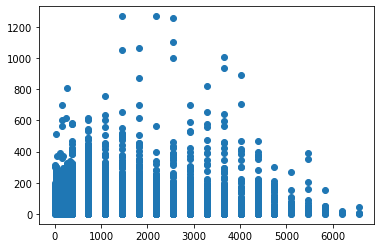

In [474]:
plt.scatter(df[df.outcome_type=='Adoption'].age_upon_intake_days, df[df.outcome_type=='Adoption'].time_in_shelter_days)

In [475]:
df[df.outcome_type=='Adoption'].time_in_shelter_days.describe()

count    33594.000000
mean        29.460366
std         52.144263
min          0.000694
25%          4.961806
50%         10.225000
75%         36.210417
max       1268.975000
Name: time_in_shelter_days, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc126ed8290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc126ee3bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc126ee04d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc126ee8650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc126ee8b50>],
 'means': []}

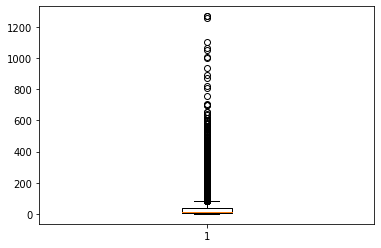

In [476]:
plt.boxplot(df[df.outcome_type=='Adoption'].time_in_shelter_days)

In [477]:
df.color.value_counts()

Black/White                  8270
Black                        6673
Brown Tabby                  4471
Brown                        3598
White                        2835
                             ... 
Brown Tabby/Black Brindle       1
Cream/Silver                    1
Yellow Brindle/Blue             1
Gray/Buff                       1
Blue Smoke/Gray                 1
Name: color, Length: 529, dtype: int64

In [478]:
df.loc[0, 'color'].split('/')

['Yellow', 'White']

In [479]:
#color split loop. 
animal_dict={}

for animal in df.index:
    color_dict={}
    color_list= df.loc[animal, 'color'].split('/')
    color_dict['color1']=color_list[0]
    color_dict['has_second_color']=len(color_list)-1
    if color_dict['has_second_color']:
        color_dict['color2']=color_list[-1]
    animal_dict[animal]=color_dict
len(animal_dict)==len(df)

True

In [480]:
to_join = pd.DataFrame.from_dict(animal_dict, orient='index')

In [481]:
df = df.join(to_join, how='left')

In [482]:
df = df[df.outcome_type=='Adoption']

In [483]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2
12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan
14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black
22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White
32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown
48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN


In [484]:
df.sex_upon_outcome.value_counts()

Neutered Male    16188
Spayed Female    15925
Intact Female      762
Intact Male        650
Unknown             69
Name: sex_upon_outcome, dtype: int64

In [485]:
df.sex_upon_intake.value_counts()

Intact Male      12406
Intact Female    12133
Spayed Female     4554
Neutered Male     4432
Unknown             69
Name: sex_upon_intake, dtype: int64

In [486]:
df.animal_type.value_counts()

Dog      20581
Cat      12675
Other      223
Bird       115
Name: animal_type, dtype: int64

In [487]:
df=df[(df.animal_type=='Dog')|(df.animal_type=='Cat')]

In [488]:
df['is_dog']=np.where(df.animal_type=='Dog', 1, 0)

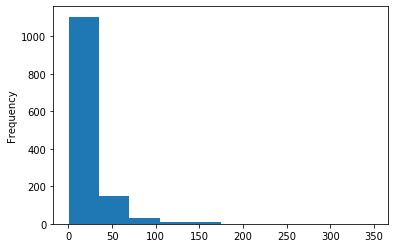

In [489]:
df[(df.sex_upon_outcome=='Intact Male')|(df.sex_upon_outcome=='Intact Female')].time_in_shelter_days.plot(kind='hist')

In [490]:
df.color1.unique()

array(['Black', 'Tan', 'Sable', 'Tricolor', 'Black Smoke', 'Brown',
       'Brown Tabby', 'Orange Tabby', 'Lilac Point', 'Tortie', 'Blue',
       'Red', 'White', 'Flame Point', 'Calico', 'Blue Tick', 'Chocolate',
       'Seal Point', 'Black Tabby', 'Brown Brindle', 'Black Brindle',
       'Blue Cream', 'Cream', 'Buff', 'Gold', 'Blue Tabby', 'Torbie',
       'Calico Point', 'Gray', 'Blue Merle', 'Lynx Point', 'Tortie Point',
       'Fawn', 'Black Tiger', 'Red Tick', 'Yellow', 'Brown Merle',
       'Blue Tiger', 'Yellow Brindle', 'Apricot', 'Blue Point',
       'Cream Tabby', 'Silver', 'Red Merle', 'Gray Tabby', 'Brown Tiger',
       'Chocolate Point', 'Silver Tabby', 'Liver', 'Ruddy', 'Agouti',
       'Orange', 'Liver Tick', 'Blue Smoke', 'Silver Lynx Point'],
      dtype=object)

In [491]:
df.sex_upon_outcome.value_counts()

Neutered Male    16105
Spayed Female    15848
Intact Female      724
Intact Male        578
Unknown              1
Name: sex_upon_outcome, dtype: int64

In [492]:
df.drop(df[df.sex_upon_outcome=='Unknown'].index,axis= 0, inplace=True)

In [493]:
df.sex_upon_outcome.value_counts()

Neutered Male    16105
Spayed Female    15848
Intact Female      724
Intact Male        578
Name: sex_upon_outcome, dtype: int64

In [494]:
animal_dict={}
for animal in df.index:
    gender_dict={}
    gender_list= df.loc[animal, 'sex_upon_outcome'].split()
    gender_dict['is_male']= int(gender_list[-1]=='Male')
    gender_dict['is_fixed']= int(gender_list[0]!='Intact')
    animal_dict[animal]=gender_dict
if len(animal_dict)==len(df):
    df = df.join(pd.DataFrame.from_dict(animal_dict, orient='index'), how='left')
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_days', 'age_upon_intake_tears', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'color1', 'has_second_color', 'color2', 'is_dog', 'is_male', 'is_fixed'], dtype='object')

In [495]:
df.intake_condition.value_counts()

Normal      31188
Injured       957
Sick          486
Nursing       484
Aged           65
Other          37
Pregnant       21
Feral          17
Name: intake_condition, dtype: int64

In [496]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed
12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1
14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1
22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1
32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1
48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1


In [497]:
city_dict= {}
for animal in df.index:
    string=df.loc[animal, 'found_location']
    if len(string.split())>3:
        location_list = string.split(' in ')[-1]
        city_dict[animal]=' '.join(location_list.split()[:-1])
    else:
        city_dict[animal]=' '.join(string.split()[:-1])
if len(city_dict)==len(df):
    to_join=pd.DataFrame.from_dict(city_dict, orient='index')
to_join.head()

,0
12,Austin
14,Austin
22,Austin
32,Austin
48,Austin


In [498]:
to_join.rename(columns={0:'found_city'}, inplace=True)

In [499]:
df= df.join(to_join, how='left')

In [500]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city
12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin
14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin
22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin
32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin
48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin


In [501]:
for name in df.found_city.unique():
    print(name)

Austin
Travis
Pflugerville
Manor
Lago Vista
Outside
Del Valle
Lakeway
Williamson
Hays
Round Rock
Webberville
Bastrop
Cedar Park
Jonestown
Burnet
Leander
Creedmoor
West Lake Hills
Bee Cave
Mustang Ridge
Sunset Valley
Point Venture
Caldwell
Blanco


In [502]:
df.animal_id_intake.nunique()

30365

In [503]:
len(df)

33255

In [504]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_days', 'age_upon_intake_tears', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'color1', 'has_second_color', 'color2', 'is_dog', 'is_male', 'is_fixed', 'found_city'], dtype='object')

In [505]:

test={}
for name in df.found_city.unique():
    if name != 'Outside':
        try:
            time.sleep(1)
            query= "+".join(name.split())+"+TX"
            response = requests.get('https://nominatim.openstreetmap.org/search?q='+query+'&format=jsonv2')
            payload = response.json()
            test[name]={'lat':payload[0]['lat'],'lon':payload[0]['lon']}
        except IndexError:
            test[name]={'lat':None, 'lon':None}
print(test)

{'Austin': {'lat': '30.2711286', 'lon': '-97.7436995'}, 'Travis': {'lat': '30.2878569', 'lon': '-97.7561392'}, 'Pflugerville': {'lat': '30.4393696', 'lon': '-97.6200043'}, 'Manor': {'lat': '30.3407629', 'lon': '-97.5569456'}, 'Lago Vista': {'lat': '30.4601975', 'lon': '-97.9883477'}, 'Del Valle': {'lat': '23.2699265', 'lon': '-106.3894398'}, 'Lakeway': {'lat': '30.3644888', 'lon': '-97.9875325'}, 'Williamson': {'lat': '30.6580927', 'lon': '-97.6041649'}, 'Hays': {'lat': '30.0447901', 'lon': '-98.0393127'}, 'Round Rock': {'lat': '30.508235', 'lon': '-97.6788934'}, 'Webberville': {'lat': '30.231045', 'lon': '-97.5166653'}, 'Bastrop': {'lat': '30.0900753', 'lon': '-97.3127179'}, 'Cedar Park': {'lat': '30.5217116', 'lon': '-97.827833'}, 'Jonestown': {'lat': '30.4954748', 'lon': '-97.9233468'}, 'Burnet': {'lat': '30.7763939', 'lon': '-98.1700016'}, 'Leander': {'lat': '30.5586046', 'lon': '-97.8444364'}, 'Creedmoor': {'lat': '30.0899368', 'lon': '-97.7338917'}, 'West Lake Hills': {'lat': '30

In [506]:
df.animal_type.unique()

array(['Dog', 'Cat'], dtype=object)

In [507]:
for location in test:
    test[location]['found_count'] = df.found_city.value_counts()[location]
    if location in df[df.animal_type=='Cat'].found_city.value_counts().index:
        test[location]['found_cats']= df[df.animal_type=='Cat'].found_city.value_counts()[location] 
    else: 
        test[location]['found_cats']= 0
    if location in df[df.animal_type=='Dog'].found_city.value_counts().index:    
        test[location]['found_dogs']= df[df.animal_type=='Dog'].found_city.value_counts()[location] 
    else:
        test[location]['found_dogs']= 0

In [508]:
df[df.animal_type=='Cat'].found_city.value_counts().index


Index(['Austin', 'Travis', 'Del Valle', 'Manor', 'Pflugerville', 'Outside', 'Leander', 'Lago Vista', 'Bastrop', 'Round Rock', 'Lakeway', 'Cedar Park', 'Creedmoor', 'Hays', 'Jonestown', 'Bee Cave', 'Mustang Ridge', 'Williamson', 'Webberville', 'Sunset Valley', 'West Lake Hills', 'Burnet'], dtype='object')

In [509]:
df['found_lat'] =df.found_city.map(lambda x: float(test[x]['lat']) if x != 'Outside' else None)
df['found_lon'] =df.found_city.map(lambda x: float(test[x]['lon']) if x != 'Outside' else None)


In [510]:
import plotly.express as px

In [511]:
city_df= pd.DataFrame.from_dict(test, orient='index')

In [512]:
city_df = city_df.applymap(lambda x: float(x))

In [513]:
fig = px.scatter_mapbox(city_df, lat= "lat", lon="lon", hover_name=city_df.index, hover_data=['found_count','found_cats', 'found_dogs'])
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [514]:
region_bins= {'Austin':['Austin'], 
       'Travis':['Travis', 'West Lake Hills', 'Sunset Valley'], 
       'South': ['Del Valle', 'Creedmoor', 'Mustang Ridge', 'Caldwell', 'Hays'],
       'Outside': ['Outside', 'Blanco'],
        'Northwest':['Burnet', 'Bee Cave', 'Lakeway', 'Point Venture', 'Lago Vista', 'Jonestown'],
        'North': ['Cedar Park', 'Leander', 'Round Rock', 'Pflugerville', 'Williamson'],
        'East': ['Manor', 'Webberville', 'Bastrop']
             }
regions={}
for a, b in region_bins.items():
    for city in b:
        regions[city]= a
df['region']= df.found_city.map(regions)

In [515]:
df.region.value_counts(dropna=False)

Austin       27516
Travis        2636
South          947
East           766
North          733
Outside        482
Northwest      175
Name: region, dtype: int64

In [516]:
df['found_city'].value_counts()

Austin             27516
Travis              2624
Del Valle            833
Manor                720
Pflugerville         494
Outside              481
Leander              105
Lago Vista            78
Round Rock            54
Cedar Park            51
Hays                  45
Lakeway               45
Creedmoor             43
Bastrop               34
Jonestown             29
Williamson            29
Mustang Ridge         21
Bee Cave              18
Webberville           12
West Lake Hills        8
Caldwell               5
Sunset Valley          4
Burnet                 3
Point Venture          2
Blanco                 1
Name: found_city, dtype: int64

In [517]:
df.reset_index(inplace=True)

In [518]:
df.breed.unique()

array(['Dachshund Mix', 'Chihuahua Shorthair',
       'Labrador Retriever/Beagle', ..., 'Chihuahua Shorthair/Catahoula',
       'Yorkshire Terrier/Dachshund', 'Norfolk Terrier/Pug'], dtype=object)

In [519]:
df= df[['index', 'age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_days', 'age_upon_intake_tears', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'color1', 'has_second_color', 'color2', 'is_dog', 'is_male', 'is_fixed', 'found_city', 'found_lat', 'found_lon', 'region']]

In [550]:
#breed split loop. 
animal_dict={}

for animal in df.index:
    breed_dict={}
    breed_list= df.loc[animal, 'breed'].split('/')
    breed_dict['breed1']=breed_list[0]
    breed_dict['is_breed2'] = 0
    if 'Mix' in breed_list[0].split():
        breed_dict['is_mix']= 1
    elif len(breed_list) >1:
        breed_dict['is_mix'] = 1
        breed_dict['breed2'] = breed_list[-1]
        breed_dict['is_breed2'] = 1
    else:
        breed_dict['is_mix']=0
    animal_dict[animal] = breed_dict
if len(animal_dict)==len(df):
    df = df.join(pd.DataFrame.from_dict(animal_dict, orient='index'), how='left')

ValueError: columns overlap but no suffix specified: Index(['breed1', 'is_breed2', 'is_mix', 'breed2'], dtype='object')

In [141]:
df.head()

,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2
0,12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin,30.271129,-97.7437,Austin,Dachshund Mix,0,1,NaN
1,14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin,30.271129,-97.7437,Austin,Chihuahua Shorthair,0,0,NaN
2,22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin,30.271129,-97.7437,Austin,Labrador Retriever,1,1,Beagle
3,32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin,30.271129,-97.7437,Austin,German Shepherd Mix,0,1,NaN
4,48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin,30.271129,-97.7437,Austin,Pointer Mix,0,1,NaN


In [340]:
set(list(df.breed1.unique())+list(df.breed2.unique()))

{'Abyssinian',
 'Abyssinian Mix',
 'Affenpinscher',
 'Affenpinscher Mix',
 'Afghan Hound',
 'Airedale Terrier',
 'Airedale Terrier Mix',
 'Akbash Mix',
 'Akita',
 'Akita Mix',
 'Alaskan Husky',
 'Alaskan Husky Mix',
 'Alaskan Malamute',
 'Alaskan Malamute Mix',
 'American Bulldog',
 'American Bulldog Mix',
 'American Curl Shorthair',
 'American Curl Shorthair Mix',
 'American Eskimo',
 'American Eskimo Mix',
 'American Foxhound',
 'American Foxhound Mix',
 'American Pit Bull Terrier',
 'American Pit Bull Terrier Mix',
 'American Shorthair Mix',
 'American Staffordshire Terrier',
 'American Staffordshire Terrier Mix',
 'American Wirehair Mix',
 'Anatol Shepherd',
 'Anatol Shepherd Mix',
 'Angora Mix',
 'Australian Cattle Dog',
 'Australian Cattle Dog Mix',
 'Australian Kelpie',
 'Australian Kelpie Mix',
 'Australian Shepherd',
 'Australian Shepherd Mix',
 'Australian Terrier',
 'Australian Terrier Mix',
 'Balinese Mix',
 'Basenji',
 'Basenji Mix',
 'Basset Hound',
 'Basset Hound Mix',
 

In [163]:
breeds = list(set(list(df[(df.is_dog==1)&(df.is_breed2==1)].breed2.unique())
+ list(df[(df.is_dog==1)&(df.is_mix==0)].breed1.unique())
+ [' '.join(breed.split()[:-1]) for breed in df[(df.is_dog==1)&(df.is_mix==1)].breed1.unique()]))

In [178]:
len(breeds)

278

In [154]:
from dogapi import dogapi 

In [158]:
headers= {'x-api-key':dogapi}

In [192]:
breed_dict={}
for breed in breeds:
    time.sleep(1)
    response = requests.get('https://api.thedogapi.com/v1/breeds/search?q='+breed, headers=headers)
    breed_dict[breed] = response.json()


In [201]:
noinfo_breed = [key for key, value in breed_dict.items() if value==[]]
moreinfo_breed = [key for key, value in breed_dict.items() if len(value)>1]


In [231]:
breed_dict

['Alaskan',
 'American',
 'American Eskimo',
 'Australian',
 'Basset',
 'Belgian',
 'Blue',
 'Border',
 'Bull',
 'Bull Terrier',
 'Bulldog',
 'Chinese',
 'Cocker',
 'Cocker Spaniel',
 'Collie',
 'English',
 'Finnish',
 'German',
 'Golden',
 'Great',
 'Greyhound',
 'Irish',
 'Italian',
 'Lhasa',
 'Mastiff',
 'Miniature',
 'Pit',
 'Pointer',
 'Presa Canario',
 'Pug',
 'Schnauzer',
 'Shih',
 'Staffordshire',
 'Swedish',
 'Tibetan',
 'Toy',
 'Vizsla',
 'Welsh']

In [232]:
breed_dict['English']

[{'weight': {'imperial': '26 - 34', 'metric': '12 - 15'},
  'height': {'imperial': '15 - 17', 'metric': '38 - 43'},
  'id': 99,
  'name': 'English Cocker Spaniel',
  'bred_for': 'Bird flushing, retrieving',
  'breed_group': 'Sporting',
  'life_span': '12 - 14 years',
  'temperament': 'Trainable, Friendly, Affectionate, Playful, Quiet, Faithful'},
 {'weight': {'imperial': '60 - 70', 'metric': '27 - 32'},
  'height': {'imperial': '24', 'metric': '61'},
  'id': 100,
  'name': 'English Foxhound',
  'bred_for': 'Trailing fox',
  'breed_group': 'Hound',
  'life_span': '10 - 13 years',
  'temperament': 'Friendly, Sociable, Companionable, Gentle, Tolerant, Active'},
 {'weight': {'imperial': '45 - 80', 'metric': '20 - 36'},
  'height': {'imperial': '24 - 25', 'metric': '61 - 64'},
  'id': 101,
  'name': 'English Setter',
  'bred_for': 'Bird setting, retrieving',
  'breed_group': 'Sporting',
  'life_span': '12 years',
  'temperament': 'Strong Willed, Mischievous, Affectionate, Energetic, Playful

In [215]:
breed_dict['Great']

[{'weight': {'imperial': '110 - 190', 'metric': '50 - 86'},
  'height': {'imperial': '28 - 32', 'metric': '71 - 81'},
  'id': 124,
  'name': 'Great Dane',
  'bred_for': 'Hunting & holding boars, Guardian',
  'breed_group': 'Working',
  'life_span': '7 - 10 years',
  'temperament': 'Friendly, Devoted, Reserved, Gentle, Confident, Loving'},
 {'weight': {'imperial': '85 - 115', 'metric': '39 - 52'},
  'height': {'imperial': '25 - 32', 'metric': '64 - 81'},
  'id': 125,
  'name': 'Great Pyrenees',
  'bred_for': 'Sheep guardian',
  'breed_group': 'Working',
  'life_span': '10 - 12 years',
  'temperament': 'Strong Willed, Fearless, Affectionate, Patient, Gentle, Confident'},
 {'weight': {'imperial': '85 - 140', 'metric': '39 - 64'},
  'height': {'imperial': '23.5 - 28.5', 'metric': '60 - 72'},
  'id': 126,
  'name': 'Greater Swiss Mountain Dog',
  'bred_for': 'Guarding and herding livestock, pulling carts loaded with milk and cheese',
  'breed_group': 'Working',
  'life_span': '7 - 9 years',

In [228]:
df[(df.breed1=='Great ')|(df.breed2=='Great ')]

,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2


In [187]:
for breed in noinfo_breeds:
    try: 
    time.sleep(1)
    response = requests.get('https://api.thedogapi.com/v1/breeds/search?q='+breed, headers=headers)
    if response.json():
        breed_dict[breed] = response.json()[0]
    else:
        breed_dict[breed]=None

In [ ]:
test={}
for name in df.found_city.unique():
    if name != 'Outside':
        try:
            time.sleep(1)
            query= "+".join(name.split())+"+TX"
            response = requests.get('https://nominatim.openstreetmap.org/search?q='+query+'&format=jsonv2', headers=headers)
            payload = response.json()
            test[name]={'lat':payload[0]['lat'],'lon':payload[0]['lon']}
        except IndexError:
            test[name]={'lat':None, 'lon':None}
print(test)

In [229]:
https://dogtime.com/dog-breeds/black-mouth-cur#/slide/1

4

In [233]:
from bs4 import BeautifulSoup

In [ ]:
html_page = requests.get('http://books.toscrape.com/') 
soup = BeautifulSoup(html_page.content, 'html.parser')

In [ ]:
<span class="attribute-list__description attribute-list__text ">Ranks 90 of 196</span>

In [249]:
breed='Anatol Shepherd'
time.sleep(1)
info_dict={}
query= '+'.join(breed.split(' ')) + '+breed'
search_page = requests.get('https://www.akc.org/?s='+query)
search_soup = BeautifulSoup(search_page.content, 'html.parser')
breed_link = search_soup.find('a', class_="d-iblock f-11 lh-solid").attrs['href']

info_page = requests.get(breed_link)
info_soup= BeautifulSoup(info_page.content, 'html.parser')
info = info_soup.findAll('span', class_="attribute-list__description")
info_list = [tag.text for tag in info]
for piece in info_list:
    if 'inches' in piece:
        info_dict['height'] = piece
    if 'pounds' in piece:
        info_dict['weight'] = piece
    if 'years' in piece:
        info_dict['lifespan'] = piece
info_dict

{'height': '29 inches (male), 27 inches (female)',
 'weight': '110-150 pounds (male), 80-120 pounds (female)',
 'lifespan': '11-13 years'}

In [274]:
scrape_dict2={}
for breed in noinfo_breed:
    time.sleep(1)
    info_dict={}
    query= '+'.join(breed.split(' ')) + '+breed'
    search_page = requests.get('https://www.akc.org/?s='+query)
    search_soup = BeautifulSoup(search_page.content, 'html.parser')
    breed_link = search_soup.find('a', class_="d-iblock f-11 lh-solid").attrs['href']

    info_page = requests.get(breed_link)
    info_soup= BeautifulSoup(info_page.content, 'html.parser')
    info = info_soup.findAll('span', class_="attribute-list__description")
    info_list = [tag.text for tag in info]
    for piece in info_list:
        if 'inches' in piece:
            info_dict['height'] = piece
        if 'pounds' in piece:
            info_dict['weight'] = piece
        if 'years' in piece:
            info_dict['life_span'] = piece
    scrape_dict2[breed] = info_dict

In [264]:
type(scrape_dict)

dict

In [275]:
scrape_dict2['Black Mouth']=scrape_dict2['Black Mouth Cur']

In [365]:
breed_dict['Dachshund'][0]['weight']['imperial']

'11 - 32'

In [379]:
breed_dict['Dachshund'][0]

{'weight': '11 - 32',
 'height': '8 - 9',
 'id': 91,
 'name': 'Dachshund',
 'bred_for': 'Rabbit hunting',
 'breed_group': 'Hound',
 'life_span': '12 - 15 years',
 'temperament': 'Clever, Stubborn, Devoted, Lively, Playful, Courageous'}

In [377]:
scrape_dict2['Dachshund Stan']['weight'] = breed_dict['Dachshund'][0]['weight']['imperial']
scrape_dict2['Dachshund Stan']['height'] = breed_dict['Dachshund'][0]['height']['imperial']
scrape_dict2['Dachshund Stan']['life_span'] = breed_dict['Dachshund'][0]['life_span']


TypeError: string indices must be integers

In [383]:
scrape_dict2['Dachshund Stan']['life_span']

'12 - 15 years'

In [368]:
scrape_dict2['Dachshund Stan']

{'weight': '11 - 32',
 'height': '8 - 9',
 'id': 91,
 'name': 'Dachshund',
 'bred_for': 'Rabbit hunting',
 'breed_group': 'Hound',
 'life_span': '12 - 15 years',
 'temperament': 'Clever, Stubborn, Devoted, Lively, Playful, Courageous'}

In [369]:
noinfo_dict = scrape_dict2

In [283]:
breed_dict

{'Affenpinscher': [{'weight': {'imperial': '6 - 13', 'metric': '3 - 6'},
   'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'},
   'id': 1,
   'name': 'Affenpinscher',
   'bred_for': 'Small rodent hunting, lapdog',
   'breed_group': 'Toy',
   'life_span': '10 - 12 years',
   'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving',
   'origin': 'Germany, France'}],
 'Afghan': [{'weight': {'imperial': '50 - 60', 'metric': '23 - 27'},
   'height': {'imperial': '25 - 27', 'metric': '64 - 69'},
   'id': 2,
   'name': 'Afghan Hound',
   'country_code': 'AG',
   'bred_for': 'Coursing and hunting',
   'breed_group': 'Hound',
   'life_span': '10 - 13 years',
   'temperament': 'Aloof, Clownish, Dignified, Independent, Happy',
   'origin': 'Afghanistan, Iran, Pakistan'}],
 'Airedale': [{'weight': {'imperial': '40 - 65', 'metric': '18 - 29'},
   'height': {'imperial': '21 - 23', 'metric': '53 - 58'},
   'id': 4,
   'name': 'Airedale Terrier',
   'bred_for': 'Badger, otter

In [ ]:
moreinfo_breed

In [423]:
morescrape_dict={}
for breed in moreinfo_breed:
    time.sleep(1)
    info_dict={}
    query= '+'.join(breed.split(' ')) + '+breed'
    search_page = requests.get('https://www.akc.org/?s='+query)
    search_soup = BeautifulSoup(search_page.content, 'html.parser')
    breed_link = search_soup.find('a', class_="d-iblock f-11 lh-solid").attrs['href']

    info_page = requests.get(breed_link)
    info_soup= BeautifulSoup(info_page.content, 'html.parser')
    info = info_soup.findAll('span', class_="attribute-list__description")
    info_list = [tag.text for tag in info]
    for piece in info_list:
        if 'inches' in piece:
            info_dict['height'] = piece
        if 'pounds' in piece:
            info_dict['weight'] = piece
        if 'years' in piece:
            info_dict['life_span'] = piece
    morescrape_dict[breed] = info_dict

In [424]:
morescrape_dict['American']=morescrape_dict['American Eskimo']
morescrape_dict['Great']=morescrape_dict['Mastiff']
morescrape_dict['Irish']=morescrape_dict['English']
morescrape_dict['Toy']=noinfo_dict['Chihuahua Longhair']

In [426]:
breed_dict['Afghan'][0]['height']['imperial']

'25 - 27'

In [428]:
[key for key,value in breed_dict.items() if not isinstance(value,list)]

[]

In [434]:
breed_dict['Dachshund'][0]

{'weight': '11 - 32',
 'height': '8 - 9',
 'id': 91,
 'name': 'Dachshund',
 'bred_for': 'Rabbit hunting',
 'breed_group': 'Hound',
 'life_span': '12 - 15 years',
 'temperament': 'Clever, Stubborn, Devoted, Lively, Playful, Courageous'}

In [411]:
breed_dict

{'Affenpinscher': [{'weight': {'imperial': '6 - 13', 'metric': '3 - 6'},
   'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'},
   'id': 1,
   'name': 'Affenpinscher',
   'bred_for': 'Small rodent hunting, lapdog',
   'breed_group': 'Toy',
   'life_span': '10 - 12 years',
   'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving',
   'origin': 'Germany, France'}],
 'Afghan': [{'weight': {'imperial': '50 - 60', 'metric': '23 - 27'},
   'height': {'imperial': '25 - 27', 'metric': '64 - 69'},
   'id': 2,
   'name': 'Afghan Hound',
   'country_code': 'AG',
   'bred_for': 'Coursing and hunting',
   'breed_group': 'Hound',
   'life_span': '10 - 13 years',
   'temperament': 'Aloof, Clownish, Dignified, Independent, Happy',
   'origin': 'Afghanistan, Iran, Pakistan'}],
 'Airedale': [{'weight': {'imperial': '40 - 65', 'metric': '18 - 29'},
   'height': {'imperial': '21 - 23', 'metric': '53 - 58'},
   'id': 4,
   'name': 'Airedale Terrier',
   'bred_for': 'Badger, otter

In [435]:
clean_breed_dict={}
for breed in breed_dict.keys():
    try:
        if breed in noinfo_dict.keys():
            clean_breed_dict[breed]= noinfo_dict[breed]
        elif breed in morescrape_dict.keys():
            clean_breed_dict[breed]= morescrape_dict[breed]
        else:
            attr_dict = {}
            attr_dict['weight'] = breed_dict[breed][0]['weight']['imperial']
            attr_dict['height'] = breed_dict[breed][0]['height']['imperial']
            attr_dict['life_span'] = breed_dict[breed][0]['life_span']
            clean_breed_dict[breed] = attr_dict
    except TypeError:
        attr_dict = {}
        attr_dict['weight'] = breed_dict[breed][0]['weight']
        attr_dict['height'] = breed_dict[breed][0]['height']
        attr_dict['life_span'] = breed_dict[breed][0]['life_span']
        clean_breed_dict[breed]=attr_dict


In [438]:
len(clean_breed_dict)

278

In [ ]:
new_breed_dict[breed][attribute] = float(attribute.split(',')[-1].split()[0].split('-')[-1])

In [315]:
import re

In [415]:
len(clean_breed_dict)

95

In [439]:
breed_df = pd.DataFrame.from_dict(clean_breed_dict, orient='index')

In [440]:
breed_df['clean_weight'] = breed_df.weight.apply(lambda x: max([float(item) for item in (re.findall('\d+', x))]) if isinstance(x, str) else x)

In [445]:
breed_df['clean_height'] = breed_df.height.apply(lambda x: max([float(item) for item in (re.findall('\d+', x))]) if isinstance(x, str) else x)

In [446]:
breed_df['clean_life'] = breed_df.life_span.apply(lambda x: max([float(item) for item in (re.findall('\d+', x))]) if isinstance(x, str) else x)

In [450]:
attr_df= breed_df[['clean_weight', 'clean_height', 'clean_life']]

In [452]:
attr_df.to_csv('breed_info.csv')

In [453]:
attr_df.head()

,clean_weight,clean_height,clean_life
Affenpinscher,13.0,11.0,12.0
Afghan,60.0,27.0,13.0
Airedale,65.0,23.0,13.0
Airedale Terrier,65.0,23.0,13.0
Akbash,120.0,34.0,12.0


In [522]:
 df= df[df.is_dog==1].reset_index()

In [527]:
attr_df.index[:100]

Index(['Affenpinscher', 'Afghan', 'Airedale', 'Airedale Terrier', 'Akbash', 'Akita', 'Alaskan', 'Alaskan Husky', 'Alaskan Malamute', 'American', 'American Bulldog', 'American Eskimo', 'American Foxhound', 'American Pit Bull', 'American Pit Bull Terrier', 'American Staffordshire', 'American Staffordshire Terrier', 'Anatol', 'Anatol Shepherd', 'Australian', 'Australian Cattle', 'Australian Cattle Dog', 'Australian Kelpie', 'Australian Shepherd', 'Australian Terrier', 'Basenji', 'Basset', 'Basset Hound', 'Beagle', 'Bearded Collie', 'Beauceron', 'Bedlington Terr', 'Belgian', 'Belgian Malinois', 'Belgian Sheepdog', 'Belgian Tervuren', 'Bernese Mountain', 'Bernese Mountain Dog', 'Bichon', 'Bichon Frise', 'Black Mouth', 'Black Mouth Cur', 'Bloodhound', 'Blue', 'Blue Lacy', 'Bluetick', 'Bluetick Hound', 'Boerboel', 'Border', 'Border Collie', 'Border Terrier', 'Borzoi', 'Boston', 'Boston Terrier', 'Boxer', 'Boykin', 'Boykin Span', 'Brittany', 'Bruss', 'Bruss Griffon', 'Bull', 'Bull Terrier',
  

In [602]:
df.breed1 = np.where(df.breed1=='Black', 'Black Tan Coonhound', df.breed1)

#cases = [df.breed2 = df.breed1.split()[-1], None]
df.breed2 = np.where((df.breed2 == 'Tan Hound Mix')|(df.breed2 == 'Tan Hound'), None, df.breed2)


In [624]:
df.breed2 = df.breed2.apply(lambda x: None if type(x)==float else x)

In [625]:
df.is_breed2 = df.breed2.apply(lambda x: int(x!=None))

In [614]:
df[df.breed2=='Dachshund']

,level_0,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2
1006,1313,4707,2 months,A664893,2013-08-10 00:00:00,NaN,Adoption,Spayed Female,60,0.164384,"(-0.025, 2.5]",2013-10-14 17:31:00,10,2013,2013-10,Monday,17,1.0,2013,8,2013-10,1 month,A664893,Dog,Black Mouth Cur/Dachshund,Tan/White,Muffin Dr in Austin (TX),Normal,Stray,Intact Female,1,30,0.082192,"(-0.025, 2.5]",2013-10-10 15:02:00,10,2013,2013-10,Thursday,15,1.0,4 days 02:29:00.000000000,4.103472,Tan,1,White,1,0,1,Austin,30.271129,-97.743700,Austin,Black Mouth Cur,1,1,Dachshund
1007,1314,4708,2 months,A664894,2013-08-10 00:00:00,NaN,Adoption,Spayed Female,60,0.164384,"(-0.025, 2.5]",2013-10-14 18:47:00,10,2013,2013-10,Monday,18,1.0,2013,8,2013-10,1 month,A664894,Dog,Black Mouth Cur/Dachshund,Tan/White,Muffin Dr in Austin (TX),Normal,Stray,Intact Female,1,30,0.082192,"(-0.025, 2.5]",2013-10-10 15:02:00,10,2013,2013-10,Thursday,15,1.0,4 days 03:45:00.000000000,4.156250,Tan,1,White,1,0,1,Austin,30.271129,-97.743700,Austin,Black Mouth Cur,1,1,Dachshund
1281,1745,5868,2 years,A666543,2011-11-03 00:00:00,NaN,Adoption,Neutered Male,730,2.000000,"(-0.025, 2.5]",2013-11-12 17:44:00,11,2013,2013-11,Tuesday,17,2.0,2011,11,2013-11,2 years,A666543,Dog,Chihuahua Shorthair/Dachshund,Red/White,8805 N Plaza in Austin (TX),Normal,Stray,Intact Male,1,730,2.000000,"(-0.025, 2.5]",2013-11-03 12:37:00,11,2013,2013-11,Sunday,12,2.0,9 days 05:07:00.000000000,9.213194,Red,1,White,1,1,1,Austin,30.271129,-97.743700,Austin,Chihuahua Shorthair,1,1,Dachshund
1282,1746,5869,6 months,A666544,2013-05-06 00:00:00,NaN,Adoption,Spayed Female,180,0.493151,"(-0.025, 2.5]",2013-11-09 13:21:00,11,2013,2013-11,Saturday,13,1.0,2013,5,2013-11,5 months,A666544,Dog,Chihuahua Shorthair/Dachshund,Red Merle/White,8805 N Plaza in Austin (TX),Normal,Stray,Intact Female,1,150,0.410959,"(-0.025, 2.5]",2013-11-03 12:37:00,11,2013,2013-11,Sunday,12,1.0,6 days 00:44:00.000000000,6.030556,Red Merle,1,White,1,0,1,Austin,30.271129,-97.743700,Austin,Chihuahua Shorthair,1,1,Dachshund
1378,1926,6278,6 years,A667049,2009-11-11 00:00:00,NaN,Adoption,Neutered Male,2190,6.000000,"(5.0, 7.5]",2016-01-18 14:57:00,1,2016,2016-01,Monday,14,1.0,2009,11,2016-01,6 years,A667049,Dog,Chihuahua Shorthair/Dachshund,White/Black,5405 Prock Ln in Austin (TX),Normal,Stray,Neutered Male,1,2190,6.000000,"(5.0, 7.5]",2016-01-14 11:09:00,1,2016,2016-01,Thursday,11,1.0,4 days 03:48:00.000000000,4.158333,White,1,Black,1,1,1,Austin,30.271129,-97.743700,Austin,Chihuahua Shorthair,1,1,Dachshund
1460,2065,6629,1 year,A667538,2012-05-19 00:00:00,NaN,Adoption,Neutered Male,365,1.000000,"(-0.025, 2.5]",2013-12-28 16:35:00,12,2013,2013-12,Saturday,16,1.0,2012,5,2013-12,1 year,A667538,Dog,Chihuahua Shorthair/Dachshund,Brown/White,Austin (TX),Injured,Owner Surrender,Intact Male,1,365,1.000000,"(-0.025, 2.5]",2013-11-19 14:57:00,11,2013,2013-11,Tuesday,14,1.0,39 days 01:38:00.000000000,39.068056,Brown,1,White,1,1,1,Austin,30.271129,-97.743700,Austin,Chihuahua Shorthair,1,1,Dachshund
1591,2244,7094,11 months,A668304,2013-02-06 00:00:00,Foster,Adoption,Spayed Female,330,0.904110,"(-0.025, 2.5]",2014-01-30 12:20:00,1,2014,2014-01,Thursday,12,1.0,2013,2,2014-01,9 months,A668304,Dog,Labrador Retriever/Dachshund,Black/White,Hwy 71 in Travis (TX),Normal,Stray,Intact Fem

In [660]:
max_weights=[]
bad_breeds=[]
for animal in df.index:
    try:
        if df.loc[animal, 'is_breed2']!=0:
            max_weights.append((attr_df.loc[df.loc[animal, 'breed1'].rstrip('Mix'), 'clean_weight'] + attr_df.loc[df.loc[animal, 'breed2'].rstrip('Mix'), 'clean_weight'])/2)
        else:
            max_weights.append(attr_df.loc[df.loc[animal, 'breed1'].rstrip('Mix').strip(), 'clean_weight'])
    except KeyError as p:
        breed=str(p).strip("'")
        if breed== 'Chinese Sharpe' or breed=='Saluk':
            max_weights.append(60)
        elif breed== 'Hound' or breed == 'Afghan Hound':
            max_weights.append(75)
        elif breed=='Patterdale Terr':
            max_weights.append(20)
        elif breed=='Borzo':
            max_weights.append(100)
        elif breed=='Basenj':
            max_weights.append(26)
        else:
            max_weights.append(30)

    
    
    

In [661]:
df['max_weight'] = max_weights

In [653]:
df[df.breed1=='Chinese Sharpei'].max_weight

69       30.0
264      30.0
882      30.0
925      30.0
926      30.0
2128     30.0
2129     30.0
3377     30.0
5790     30.0
6546     30.0
6740     30.0
7479     30.0
8253     30.0
8484     30.0
9668     30.0
11816    30.0
11929    30.0
13758    30.0
14505    30.0
14726    30.0
16546    30.0
17327    30.0
17991    30.0
19955    30.0
20148    30.0
Name: max_weight, dtype: float64

In [592]:

invest = [(df.loc[animal, 'breed1'], df.loc[animal, 'breed2'])for animal in bad_breeds]

,level_0,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2,max_weight
568,747,3086,8 years,A643131,2009-12-05 00:00:00,Foster,Adoption,Neutered Male,2920,8.000000,"(7.5, 10.0]",2018-03-26 17:54:00,3,2018,2018-03,Monday,17,1.0,2009,12,2018-03,7 years,A643131,Dog,Mastiff Mix,Tan/White,5106 Village Square in Austin (TX),Normal,Stray,Neutered Male,1,2555,7.000000,"(5.0, 7.5]",2017-10-10 12:56:00,10,2017,2017-10,Tuesday,12,1.0,167 days 04:58:00.000000000,167.206944,Tan,1,White,1,1,1,Austin,30.271129,-97.743700,Austin,Mastiff Mix,0,1,None,230.0
1470,2082,6682,7 years,A667657,2006-11-20 00:00:00,NaN,Adoption,Neutered Male,2555,7.000000,"(5.0, 7.5]",2013-12-01 13:10:00,12,2013,2013-12,Sunday,13,1.0,2006,11,2013-12,7 years,A667657,Dog,Mastiff Mix,Brown Brindle/White,5501S Ih 35 in Austin (TX),Normal,Stray,Neutered Male,1,2555,7.000000,"(5.0, 7.5]",2013-11-20 18:57:00,11,2013,2013-11,Wednesday,18,1.0,10 days 18:13:00.000000000,10.759028,Brown Brindle,1,White,1,1,1,Austin,30.271129,-97.743700,Austin,Mastiff Mix,0,1,None,230.0
1896,2656,8123,2 years,A669798,2011-12-27 00:00:00,NaN,Adoption,Neutered Male,730,2.000000,"(-0.025, 2.5]",2014-06-10 17:38:00,6,2014,2014-06,Tuesday,17,2.0,2011,12,2014-06,2 years,A669798,Dog,Mastiff Mix,Red/White,15600 Fm 812 in Travis (TX),Injured,Stray,Intact Male,1,730,2.000000,"(-0.025, 2.5]",2013-12-27 15:02:00,12,2013,2013-12,Friday,15,2.0,165 days 02:36:00.000000000,165.108333,Red,1,White,1,1,1,Travis,30.287857,-97.756139,Travis,Mastiff Mix,0,1,None,230.0
5006,7528,20710,3 years,A686960,2013-03-03 00:00:00,NaN,Adoption,Neutered Male,1095,3.000000,"(2.5, 5.0]",2016-10-22 17:38:00,10,2016,2016-10,Saturday,17,1.0,2013,3,2016-10,3 years,A686960,Dog,Mastiff Mix,Tan/Black,Outside Jurisdiction,Normal,Owner Surrender,Neutered Male,1,1095,3.000000,"(2.5, 5.0]",2016-10-21 08:47:00,10,2016,2016-10,Friday,8,1.0,1 days 08:51:00.000000000,1.368750,Tan,1,Black,1,1,1,Outside,NaN,NaN,Outside,Mastiff Mix,0,1,None,230.0
5556,8456,23047,1 year,A689952,2013-10-11 00:00:00,NaN,Adoption,Spayed Female,365,1.000000,"(-0.025, 2.5]",2014-10-19 17:54:00,10,2014,2014-10,Sunday,17,1.0,2013,10,2014-10,1 year,A689952,Dog,Mastiff Mix,Brown Brindle,15527 Fm 969 in Austin (TX),Normal,Stray,Intact Female,1,365,1.000000,"(-0.025, 2.5]",2014-10-11 16:22:00,10,2014,2014-10,Saturday,16,1.0,8 days 01:32:00.000000000,8.063889,Brown Brindle,0,NaN,1,0,1,Austin,30.271129,-97.743700,Austin,Mastiff Mix,0,1,None,230.0
5823,8886,24273,3 years,A691617,2011-08-07 00:00:00,NaN,Adoption,Neutered Male,1095,3.000000,"(2.5, 5.0]",2014-12-11 18:46:00,12,2014,2014-12,Thursday,18,1.0,2011,8,2014-12,3 years,A691617,Dog,Mastiff Mix,Sable,Braker Ln And Parkfield in Austin (TX),Normal,Stray,Intact Male,1,1095,3.000000,"(2.5, 5.0]",2014-11-07 13:13:00,11,2014,2014-11,Friday,13,1.0,34 days 05:33:00.000000000,34.231250,Sable,0,NaN,1,1,1,Austin,30.271129,-97.743700,Austin,Mastiff Mix,0,1,None,230.0
6213,9444,25649,2 years,A693455,2012-12-08 00:00:00,NaN,Adoption,Neutered Male,730,2.000000,"(-0.025, 2.5]",2014-12-14 09:15:00,12,2014,2014-12,Sunday,9,1.0,2012,12,2014-12,2 years,A693455,Dog,Mastiff Mix,Tan/Black,16218 Round Mountain in Travis (TX),Normal,Stray,Neutered Male,1,730,2.000000,"(-0.025, 2.5]",2014-12-08 13:21:00,12,2014,2014-12,Monday,13,1.0,5 days 19:54:00.00

In [601]:
attr_df

,clean_weight,clean_height,clean_life
Affenpinscher,13.0,11.0,12.0
Afghan,60.0,27.0,13.0
Airedale,65.0,23.0,13.0
Airedale Terrier,65.0,23.0,13.0
Akbash,120.0,34.0,12.0
Akita,115.0,28.0,14.0
Alaskan,85.0,25.0,14.0
Alaskan Husky,50.0,26.0,13.0
Alaskan Malamute,100.0,25.0,15.0
American,35.0,19.0,15.0


In [643]:
df[df.breed1=='Chinese Sharpei'].max_weight

69       30.0
264      30.0
882      30.0
925      30.0
926      30.0
2128     30.0
2129     30.0
3377     30.0
5790     30.0
6546     30.0
6740     30.0
7479     30.0
8253     30.0
8484     30.0
9668     30.0
11816    30.0
11929    30.0
13758    30.0
14505    30.0
14726    30.0
16546    30.0
17327    30.0
17991    30.0
19955    30.0
20148    30.0
Name: max_weight, dtype: float64

In [667]:
#code for max height column

max_heights=[]
bad_breeds=[]

for animal in df.index:

    try:

        if df.loc[animal, 'is_breed2']!=0:

            max_heights.append((attr_df.loc[df.loc[animal, 'breed1'].rstrip('Mix'), 'clean_height'] + attr_df.loc[df.loc[animal, 'breed2'].rstrip('Mix'), 'clean_height'])/2)

        else:

            max_heights.append(attr_df.loc[df.loc[animal, 'breed1'].rstrip('Mix').strip(), 'clean_height'])

    except KeyError as p:
        breed=str(p).strip("'")
        if breed== 'Chinese Sharpe':
            max_heights.append(20)
        elif breed== 'Hound' or breed == 'Saluk':
            max_heights.append(27)
        elif breed == 'Afghan Hound':
            max_heights.append(30)
        elif breed=='Patterdale Terr':
            max_heights.append(15)
        elif breed=='Borzo':
            max_heights.append(36)
        elif breed=='Basenj':
            max_heights.append(17)
        elif breed=='Pembroke Welsh Corg' or breed=='Cardigan Welsh Corg':
            max_heights.append(13)
        else:    
            print(breed)
        

In [668]:
df['max_height']=max_heights

In [669]:
max_life=[]


for animal in df.index:

    try:

        if df.loc[animal, 'is_breed2']!=0:

            max_life.append((attr_df.loc[df.loc[animal, 'breed1'].rstrip('Mix'), 'clean_life'] + attr_df.loc[df.loc[animal, 'breed2'].rstrip('Mix'), 'clean_life'])/2)

        else:

            max_life.append(attr_df.loc[df.loc[animal, 'breed1'].rstrip('Mix').strip(), 'clean_life'])

    except KeyError as p:
        breed=str(p).strip("'")
        if breed== 'Chinese Sharpe':
            max_life.append(11)
        elif breed== 'Hound' or breed=='Patterdale Terr':
            max_life.append(12)
        elif breed == 'Saluk' or breed == 'Afghan Hound':
            max_life.append(14)
        elif breed=='Borzo':
            max_life.append(10)
        elif breed=='Basenj':
            max_life.append(16)
        elif breed=='Pembroke Welsh Corg' or breed=='Cardigan Welsh Corg':
            max_life.append(15)
        else:    
            print(breed)
        

In [670]:
df['max_life']=max_life

In [672]:
df[df.max_life==8]

,level_0,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2,max_weight,max_height,max_life
1249,1691,5703,8 months,A666312,2013-03-02 00:00:00,NaN,Adoption,Neutered Male,240,0.657534,"(-0.025, 2.5]",2013-11-03 17:28:00,11,2013,2013-11,Sunday,17,1.0,2013,3,2013-11,7 months,A666312,Dog,Leonberger Mix,Brown Brindle/White,Webberville Rd And Taylor Ln in Travis (TX),Normal,Stray,Intact Male,1,210,0.575342,"(-0.025, 2.5]",2013-10-30 11:06:00,10,2013,2013-10,Wednesday,11,1.0,4 days 06:22:00.000000000,4.265278,Brown Brindle,1,White,1,1,1,Travis,30.287857,-97.756139,Travis,Leonberger Mix,0,1,None,170.0,31.0,8.0
1250,1692,5704,8 months,A666313,2013-03-02 00:00:00,NaN,Adoption,Neutered Male,240,0.657534,"(-0.025, 2.5]",2013-11-03 17:26:00,11,2013,2013-11,Sunday,17,1.0,2013,3,2013-11,7 months,A666313,Dog,Leonberger Mix,Brown/White,Webberville Rd And Taylor Ln in Travis (TX),Normal,Stray,Intact Male,1,210,0.575342,"(-0.025, 2.5]",2013-10-30 11:06:00,10,2013,2013-10,Wednesday,11,1.0,4 days 06:20:00.000000000,4.263889,Brown,1,White,1,1,1,Travis,30.287857,-97.756139,Travis,Leonberger Mix,0,1,None,170.0,31.0,8.0
1251,1693,5708,2 months,A666317,2013-08-30 00:00:00,NaN,Adoption,Neutered Male,60,0.164384,"(-0.025, 2.5]",2013-11-04 12:08:00,11,2013,2013-11,Monday,12,1.0,2013,8,2013-11,1 month,A666317,Dog,Leonberger Mix,Tan/Black,421 Thompson Ln in Austin (TX),Normal,Stray,Intact Male,1,30,0.082192,"(-0.025, 2.5]",2013-10-30 12:14:00,10,2013,2013-10,Wednesday,12,1.0,4 days 23:54:00.000000000,4.995833,Tan,1,Black,1,1,1,Austin,30.271129,-97.743700,Austin,Leonberger Mix,0,1,None,170.0,31.0,8.0
1910,2683,8189,7 years,A669871,2007-01-03 00:00:00,NaN,Adoption,Spayed Female,2555,7.000000,"(5.0, 7.5]",2014-01-04 15:04:00,1,2014,2014-01,Saturday,15,1.0,2007,1,2014-01,6 years,A669871,Dog,Irish Wolfhound Mix,White,12034 Research Blvd in Austin (TX),Normal,Stray,Spayed Female,1,2190,6.000000,"(5.0, 7.5]",2013-12-29 02:04:00,12,2013,2013-12,Sunday,2,1.0,6 days 13:00:00.000000000,6.541667,White,0,NaN,1,0,1,Austin,30.271129,-97.743700,Austin,Irish Wolfhound Mix,0,1,None,180.0,35.0,8.0
3577,5041,14481,3 years,A678931,2011-05-14 00:00:00,NaN,Adoption,Neutered Male,1095,3.000000,"(2.5, 5.0]",2014-05-20 18:37:00,5,2014,2014-05,Tuesday,18,1.0,2011,5,2014-05,3 years,A678931,Dog,Irish Wolfhound Mix,Black,3218 Enfield Rd in Austin (TX),Injured,Stray,Neutered Male,1,1095,3.000000,"(2.5, 5.0]",2014-05-14 11:54:00,5,2014,2014-05,Wednesday,11,1.0,6 days 06:43:00.000000000,6.279861,Black,0,NaN,1,1,1,Austin,30.271129,-97.743700,Austin,Irish Wolfhound Mix,0,1,None,180.0,35.0,8.0
4859,7300,20111,5 months,A686131,2014-06-16 00:00:00,Foster,Adoption,Intact Male,150,0.410959,"(-0.025, 2.5]",2014-12-13 11:46:00,12,2014,2014-12,Saturday,11,1.0,2014,6,2014-12,1 month,A686131,Dog,Leonberger Mix,Brown/White,623 Blue Valley Dr in Austin (TX),Normal,Stray,Intact Male,1,30,0.082192,"(-0.025, 2.5]",2014-08-16 17:54:00,8,2014,2014-08,Saturday,17,1.0,118 days 17:52:00.000000000,118.744444,Brown,1,White,1,1,0,Austin,30.271129,-97.743700,Austin,Leonberger Mix,0,1,None,170.0,31.0,8.0
5552,8432,22990,3 months,A689872,2014-07-15 00:00:00,NaN,Adoption,Neutered Male,90,0.246575,"(-0.025, 2.5]",2014-10-15 18:17:00,10,2014,2014-10,Wednesday,18,1.0,2014,7,2014-10,2 months,A689872,Dog,Leonberger Mix,

In [673]:
df.to_csv('shelter_breed.csv')